In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('tmp.csv')

In [15]:
df = df[df['line number'] != -1]
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [16]:
host_df = df[(df['user'] == 'host')]
watcher_df = df[(df['user'] == 'watcher')]
__min = max(min(host_df['timestamp']), min(watcher_df['timestamp']))
__max = min(max(host_df['timestamp']), max(watcher_df['timestamp']))
host_df = host_df[(host_df['timestamp'] > __min) & (host_df['timestamp'] < __max)]
watcher_df = watcher_df[(watcher_df['timestamp'] > __min) & (watcher_df['timestamp'] < __max)]

In [17]:
from datetime import timedelta

In [18]:
data = []
STEP = timedelta(seconds=0.5)
current = __min
while current < __max:
    interval = current + STEP
    h = host_df[(host_df['timestamp'] >= current) & (host_df['timestamp'] <= interval)]
    w = watcher_df[(watcher_df['timestamp'] >= current) & (watcher_df['timestamp'] <= interval)]
    if h.empty or w.empty:
        current = interval
        continue
    h_num = round(h['line number'].mean())
    w_num = round(w['line number'].mean())
    data.append((h_num, w_num, current))
    current = interval

In [19]:
df2 = pd.DataFrame(data, columns=['host line', 'watcher line', 'timestamp'])

In [20]:
import matplotlib.pyplot as plt

In [21]:
df2['secs'] = (df2['timestamp'] - __min).dt.seconds

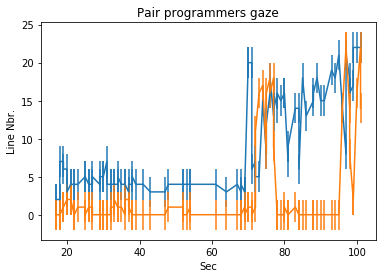

In [22]:
# Plot actual gaze tracking section
plt.errorbar(df2['secs'], df2['host line'], 2)
plt.errorbar(df2['secs'], df2['watcher line'], 2)
plt.title('Pair programmers gaze')
plt.xlabel('Sec')
plt.ylabel('Line Nbr.')
plt.show()

In [23]:
overlap = len([x for x in data if abs(x[0]-x[1]) <= 4])/len(data) * 100
print(f'Eyes were overlapping {overlap:.2f}% of the time')

Eyes were overlapping 54.55% of the time
